<a href="https://colab.research.google.com/github/RRB2023/RRB2023.github.io/blob/main/Week10%2B11_Portfolio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 10 and 11: Machine learning

**Data hypothesis: Do countries with higher alcohol consumption spend more on healthcare?**

I have used machine learning to create a linear regression model. This is an example of supervised learning.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
life_expectancy_data = pd.read_csv("https://raw.githubusercontent.com/RRB2023/RRB2023.github.io/main/Life%20Expectancy%20Data.csv")
data = life_expectancy_data.copy()
data = data.dropna()  

lindata= data.copy()

In [ ]:
lindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [ ]:
lindata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
model = LinearRegression()
x = lindata.Alcohol.values.reshape(-1,1)
y = lindata['percentage expenditure'].values.reshape(-1,1)

model.fit(x,y)

LinearRegression()

[[182.09171816]]
[-126.48386782]


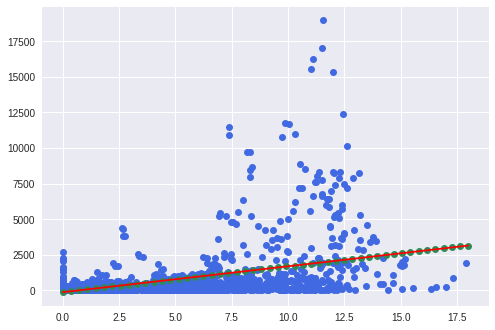

In [ ]:
x_fit = np.linspace(0, 18, 50)[:, np.newaxis] 
y_fit = model.predict(x_fit)

plt.plot(x.squeeze(), y, 'o', color='royalBlue')
plt.plot(x_fit.squeeze(), y_fit, 'o', color='seagreen');
plt.plot(x_fit.squeeze(), y_fit, color='red');
print(model.coef_)
print(model.intercept_)

**Comment: This model shows a positive correlation bewteen alcohol consumption per capita, in litres of pure alcohol, (shown on x-axis) and the percentage exepnditure (shown on y-axis) meaning spending on health as percentage of GDP per capita. This suggests the data hypothesis is correct, that countries with higher alcohol consumption levels do tend to spend more money on healthcare.**

**Unsupervised Learning**

**Data hypothesis: Do richer countries have higher rates of immunization for infants?**

I have used machine learning to do clustering. This is an example of unsupervised learning.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

import scipy.cluster.hierarchy as sch

In [ ]:
life_expectancy_data = pd.read_csv("https://raw.githubusercontent.com/RRB2023/RRB2023.github.io/main/Life%20Expectancy%20Data.csv")
data = life_expectancy_data.copy()
data = data.dropna() 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/RRB2023/RRB2023.github.io/main/Life%20Expectancy%20Data.csv')

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:

data = data.dropna()

data.drop(['Country', 'Status', 'percentage expenditure', 'Alcohol', 'Total expenditure', 'Schooling', 'Population', 'Income composition of resources', 'Adult Mortality'], axis=1, inplace=True) 

data.head()



/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Life expectancy,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years
0,2015,65.0,62,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,17.2,17.3
1,2014,59.9,64,62.0,492,18.6,86,58.0,62.0,0.1,612.696514,17.5,17.5
2,2013,59.9,66,64.0,430,18.1,89,62.0,64.0,0.1,631.744976,17.7,17.7
3,2012,59.5,69,67.0,2787,17.6,93,67.0,67.0,0.1,669.959000,17.9,18.0
4,2011,59.2,71,68.0,3013,17.2,97,68.0,68.0,0.1,63.537231,18.2,18.2


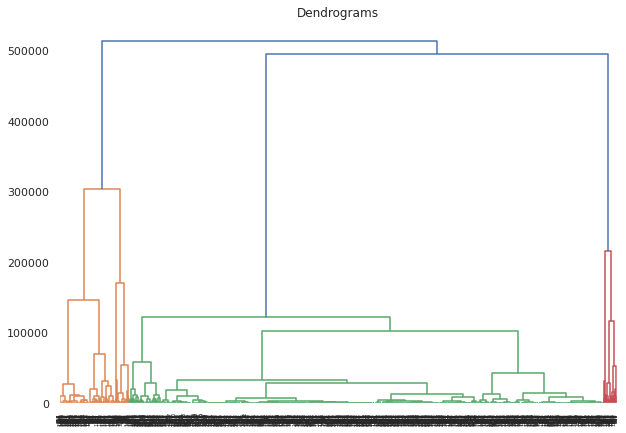

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(data, method='ward', metric='euclidean'))

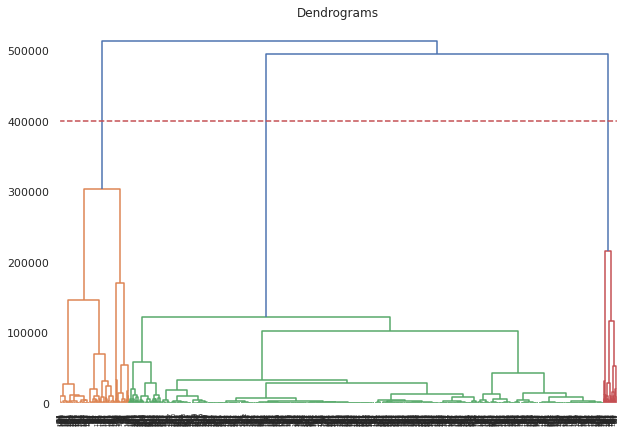

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(data, method='ward', metric='euclidean'))
plt.axhline(y=400000, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([2, 2, 2, ..., 2, 2, 2])

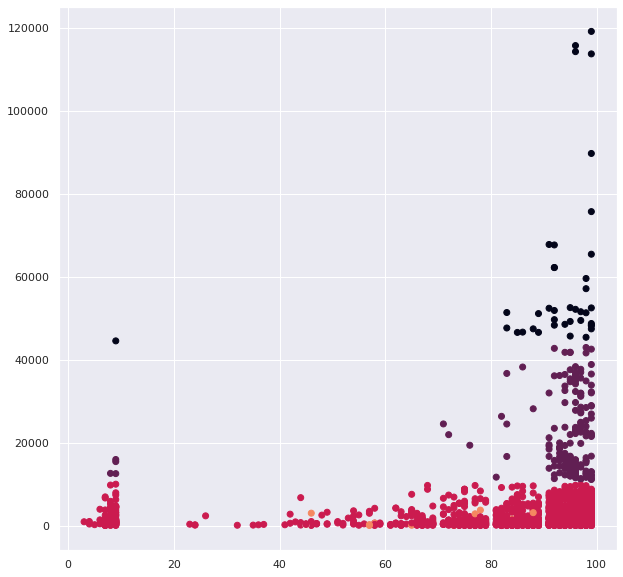

In [ ]:
plt.figure(figsize=(10, 10))  

plt.scatter(data['Polio'], data['GDP'], c=cluster.labels_) 

This shows the Polio (Pol3) immunization coverage among 1-year-olds (%) (x-axis) against GDP per capita (in USD). 

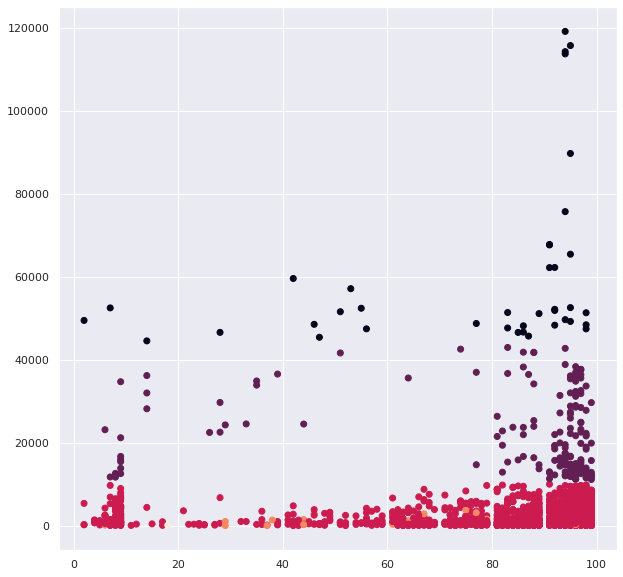

In [ ]:
plt.figure(figsize=(10, 10))  

plt.scatter(data['Hepatitis B'], data['GDP'], c=cluster.labels_) 

This shows the Hepatitis B (HepB) immunization coverage among 1-year-olds (%) (x-axis) against GDP per capita (in USD).

**Comment on data hypothesis: Although there is more variation in the clusters for hepatitis B immunization, both charts show that countries with higher GDP per capita (purple and black clusters), immunization coverage is closest to and reaches 100%. Whereas the pink and orange clusters which represent countries with less than 20,000 dollars per capita is far more spread out between no immunization and 100%. This suggests that on average, richer countries do tend to have a higher immunization rate for infants.**